In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Reading the dataset (csv file)
df= pd.read_csv("temperature_data (1).csv")
df.head()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033,4.0
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631,4.0
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343,4.0
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632,4.0
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145,4.0


In [ ]:
df.tail()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
102536,-0.190175,-1.061576,-0.338235,1.587624,1.212487,-0.003909,-0.329840,0.001165,0.140607,-0.914417,-0.761951,-0.724745,20.0
102537,-0.234491,-1.061707,-0.338429,1.587901,1.212484,-0.003937,-0.329728,0.001181,0.139492,-0.914350,-0.761951,-0.725017,20.0
102538,-0.268325,-1.061586,-0.338902,1.587591,1.212486,-0.003865,-0.329942,0.001186,0.138476,-0.914275,-0.761951,-0.725210,20.0
102539,-0.313024,-1.060307,-0.339400,1.586714,1.212485,-0.003213,-0.329543,0.001131,0.137306,-0.914585,-0.761951,-0.725449,20.0
102540,-0.393314,-1.057295,-0.339347,1.587254,1.212485,-0.003455,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# EDA

In [ ]:
df.shape

(102541, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102541 entries, 0 to 102540
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ambient         102541 non-null  float64
 1   coolant         102541 non-null  float64
 2   u_d             102541 non-null  float64
 3   u_q             102541 non-null  float64
 4   motor_speed     102541 non-null  float64
 5   torque          102541 non-null  float64
 6   i_d             102540 non-null  float64
 7   i_q             102540 non-null  float64
 8   pm              102540 non-null  float64
 9   stator_yoke     102540 non-null  float64
 10  stator_tooth    102540 non-null  float64
 11  stator_winding  102540 non-null  float64
 12  profile_id      102540 non-null  float64
dtypes: float64(13)
memory usage: 10.2 MB


In [ ]:
df.isnull().any()

,0
ambient,False
coolant,False
u_d,False
u_q,False
motor_speed,False
torque,False
i_d,True
i_q,True
pm,True
stator_yoke,True


In [ ]:
df.duplicated().any()

False

In [ ]:
df.describe()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
count,102541.000000,102541.000000,102541.000000,102541.000000,102541.000000,102541.000000,102540.000000,102540.000000,102540.000000,102540.000000,102540.000000,102540.000000,102540.000000
mean,-0.310728,-0.886375,-0.276181,0.259699,0.356578,0.036178,-0.119992,0.027540,-0.377933,-0.845775,-0.696618,-0.568825,7.090794
std,0.817383,0.541812,0.974382,0.798846,1.044576,0.735537,1.057084,0.725409,1.138096,0.788230,0.978340,1.055348,3.885899
min,-3.698899,-1.288667,-1.655373,-1.861463,-1.239020,-2.808664,-3.245874,-2.398035,-2.524219,-1.834688,-2.066143,-2.019973,4.000000
25%,-0.986066,-1.082874,-1.140921,-0.414433,-0.646165,-0.259354,-1.024812,-0.245727,-1.311252,-1.518361,-1.679375,-1.660584,4.000000
50%,-0.265886,-1.069040,-0.052702,0.641275,0.130298,0.286215,-0.346737,0.236025,-0.468938,-0.989348,-0.807586,-0.645496,6.000000
75%,0.354249,-1.047794,0.315093,0.776801,1.483026,0.357810,0.994309,0.323025,0.375823,-0.528193,-0.096902,0.143573,10.000000
max,2.712510,1.110164,2.274734,1.765330,2.024164,2.330284,1.033528,2.346026,2.291651,1.331096,1.441976,1.879934,20.000000


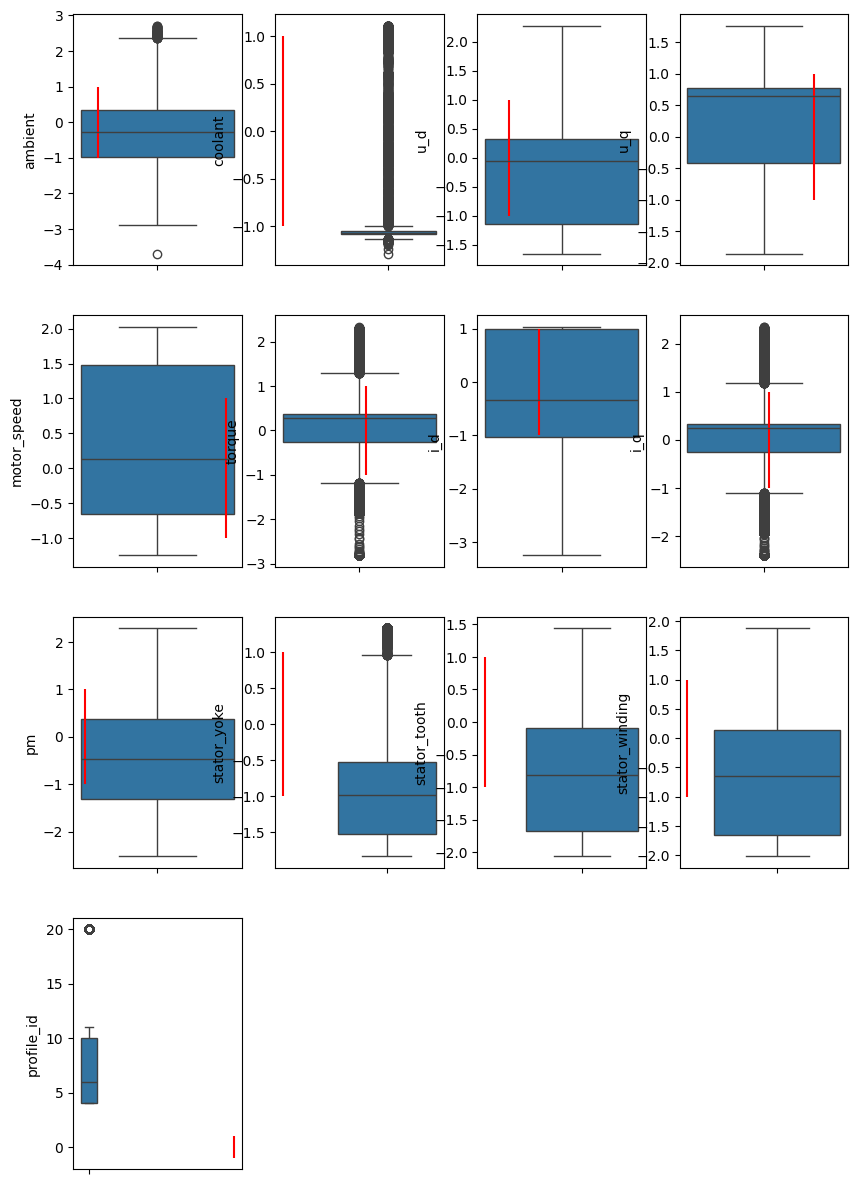

In [ ]:
# Plotting the Boxplots of each column
plt.figure(figsize=(10,15))
for i in range(len(df.columns)):
    plt.subplot(4,4,i+1)
    sn.boxplot(df[df.columns[i]])
    plt.vlines(df[df.columns[i]].mean(),ymin = -1,ymax = 1,color = 'r')
plt.show()

### Observations

1. Ambient temperature seems to be having the outliers (on the extreme).
2. Remaining features doesn't seem to be having the outliers which may affect prediction.
3. Also mean and median of most of feature seems to coincide or are similar.

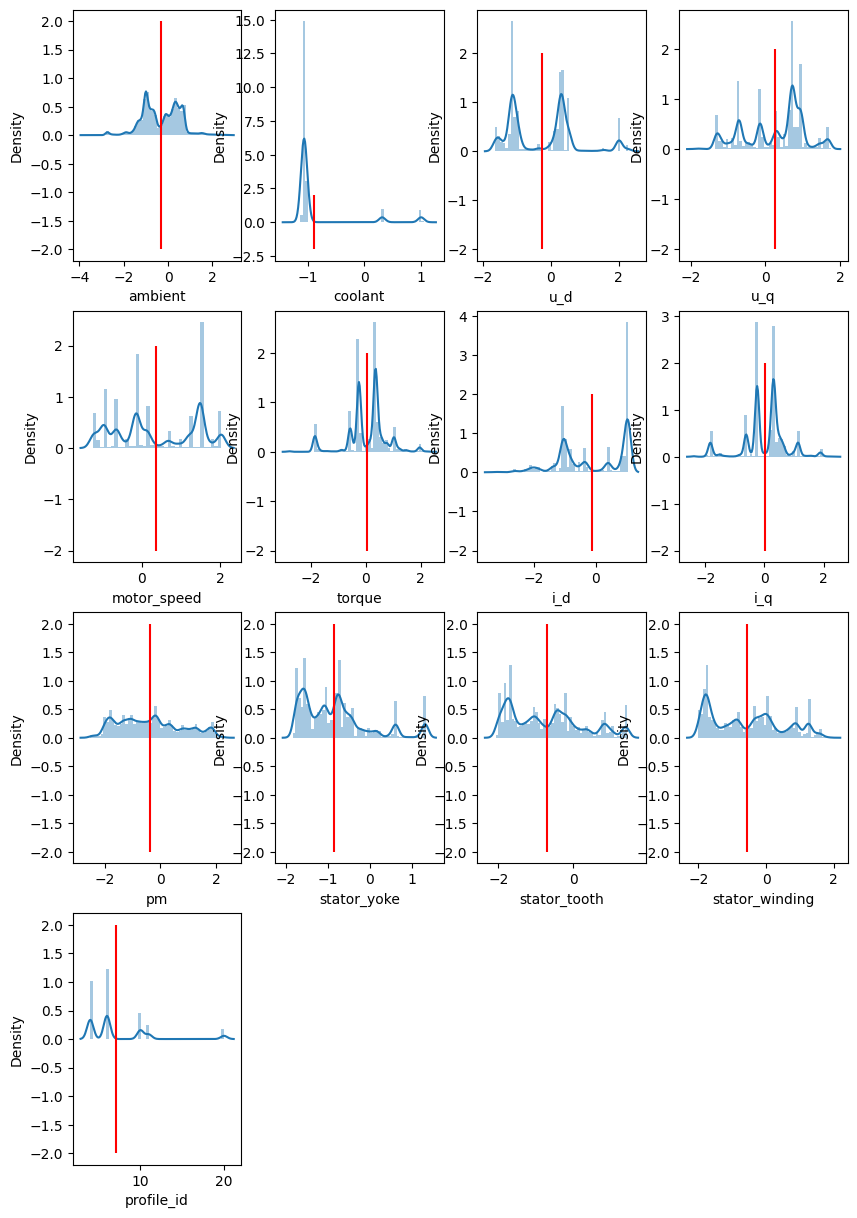

In [ ]:
# Plotting the distributions of each column
plt.figure(figsize=(10,15))
for i in range(len(df.columns)):
    plt.subplot(4,4,i+1)
    sn.distplot(df[df.columns[i]])
    plt.vlines(df[df.columns[i]].mean(),ymin = -2,ymax = 2,color = 'r')
plt.show()

### Observations

1. some of the features seem to be of Normal distribution.
2. Ambient temperature and current d component seems a little left tailed.
3. coolant temperature, voltage q component and motor speed are right tailed

In [ ]:
# Checking the correlation between features
plt.figure(figsize=(16,16))
sn.pairplot(data.sample(1000))
plt.show()

NameError: name 'data' is not defined

<Figure size 1600x1600 with 0 Axes>

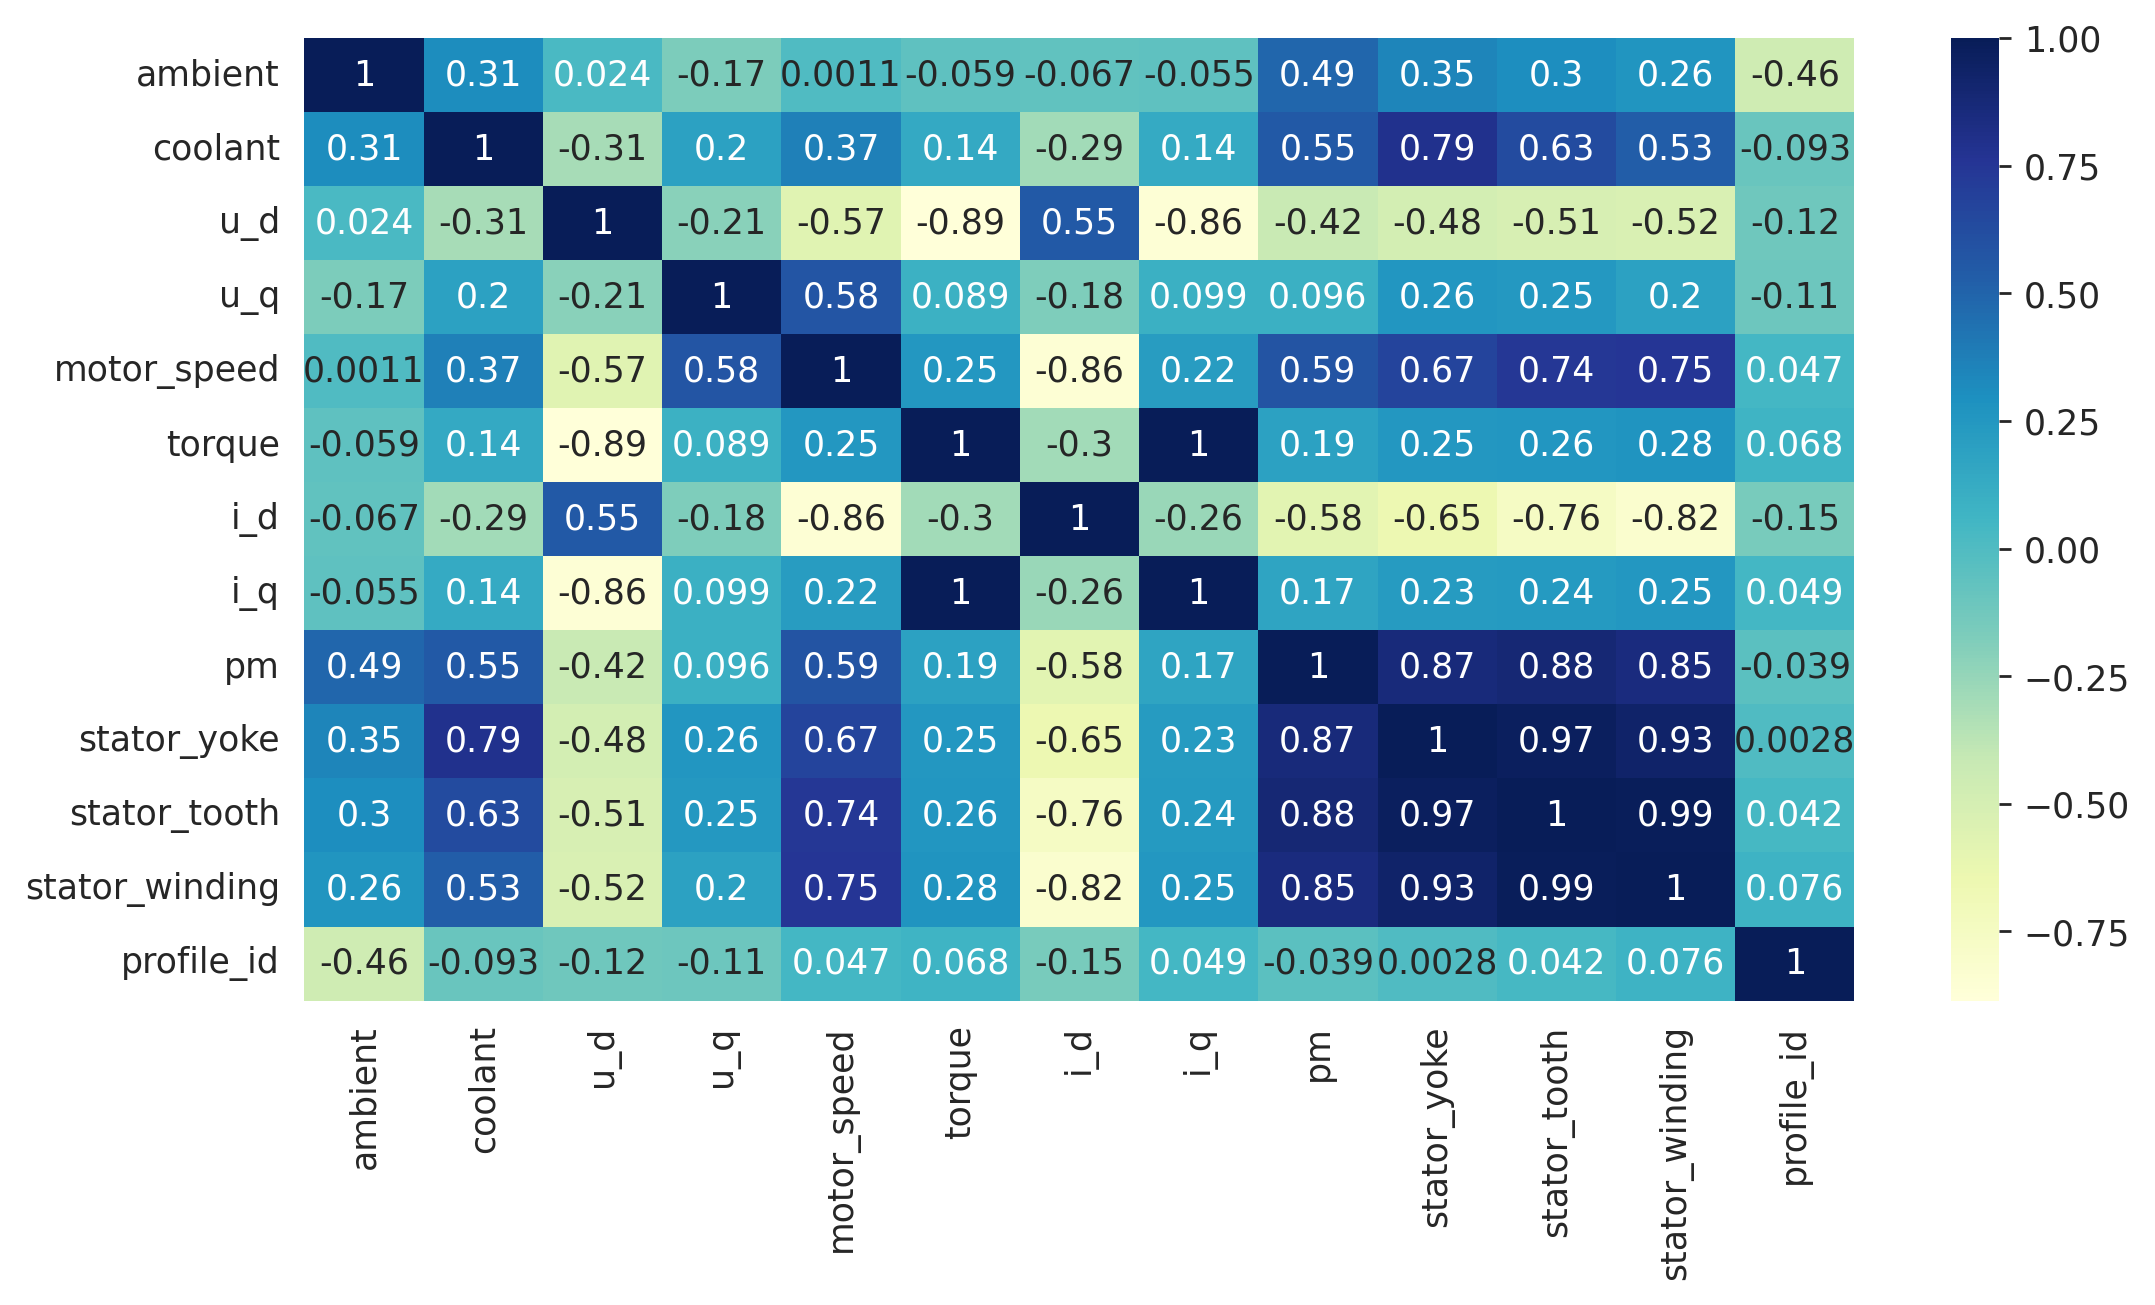

In [ ]:
# PLottind the heat map to check correlation
plt.figure(figsize=(10,5))
sn.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.show()

### Observations on correlation

1. It seems that torque and current d component are perfectly correlated.
2. Also Stater yoke, Stater tooth and stater winding temperatures are dependent on each other.Ther are highly correlated.

**Model Builing**

**Importing Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid') # background
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033,4.0
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631,4.0
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343,4.0
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632,4.0
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102536,-0.190175,-1.061576,-0.338235,1.587624,1.212487,-0.003909,-0.329840,0.001165,0.140607,-0.914417,-0.761951,-0.724745,20.0
102537,-0.234491,-1.061707,-0.338429,1.587901,1.212484,-0.003937,-0.329728,0.001181,0.139492,-0.914350,-0.761951,-0.725017,20.0
102538,-0.268325,-1.061586,-0.338902,1.587591,1.212486,-0.003865,-0.329942,0.001186,0.138476,-0.914275,-0.761951,-0.725210,20.0
102539,-0.313024,-1.060307,-0.339400,1.586714,1.212485,-0.003213,-0.329543,0.001131,0.137306,-0.914585,-0.761951,-0.725449,20.0


In [ ]:
# Dropping profile id as it does not have any significance in predicting motor speed
df_1=df.drop(['profile_id'],axis=1)

In [ ]:
# Splitting the dataset into dependent and independent variable
# Here we put every  variables except motor speed into X variablle and motor speed into y variable
X=df_1.drop(['motor_speed'],axis=1)
y=df_1['motor_speed']
y

,motor_speed
0,-1.222428
1,-1.222429
2,-1.222428
3,-1.222430
4,-1.222429
...,...
102536,1.212487
102537,1.212484
102538,1.212486
102539,1.212485


In [ ]:
X

,ambient,coolant,u_d,u_q,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding
0,-0.752143,-1.118446,0.327935,-1.297858,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033
1,-0.771263,-1.117021,0.329665,-1.297686,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631
2,-0.782892,-1.116681,0.332771,-1.301822,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343
3,-0.780935,-1.116764,0.333700,-1.301852,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632
4,-0.774043,-1.116775,0.335206,-1.303118,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145
...,...,...,...,...,...,...,...,...,...,...,...
102536,-0.190175,-1.061576,-0.338235,1.587624,-0.003909,-0.329840,0.001165,0.140607,-0.914417,-0.761951,-0.724745
102537,-0.234491,-1.061707,-0.338429,1.587901,-0.003937,-0.329728,0.001181,0.139492,-0.914350,-0.761951,-0.725017
102538,-0.268325,-1.061586,-0.338902,1.587591,-0.003865,-0.329942,0.001186,0.138476,-0.914275,-0.761951,-0.725210
102539,-0.313024,-1.060307,-0.339400,1.586714,-0.003213,-0.329543,0.001131,0.137306,-0.914585,-0.761951,-0.725449


In [ ]:
#Splitting Data into train and test Data
from sklearn.model_selection import train_test_split,GridSearchCV
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
# Here we have used 70% data for training our model and kept 30% data for testing purpose

**Decision Tree Model**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model_1=DecisionTreeRegressor()
model_1.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred1=model_1.predict(X_test)
# Predection of y values on X test dataset

In [ ]:
# Evaluationg The Model with the help of r2 score matrix
from sklearn.metrics import r2_score
rms_1=np.round(np.mean((y_pred1-y_test)**2),5)
rmse_1=np.round(np.mean((y_pred1-y_test)**0.5),5)
rmsle_1=np.round(np.log(rmse_1),5)
r2_1=np.round(r2_score(y_test,y_pred1),5)
ar_1=np.round(1 - ((1-r2_1)*(299421-1)/(299421-11-1)),5)
print(rms_2,rmse_2,rmsle_1,r2_1,ar_1)

0.00012 0.01041 -4.57561 0.9999 0.9999


In [ ]:
model_1.score(X_test,y_test)
# Accuracy of the Model

0.9999001329925169

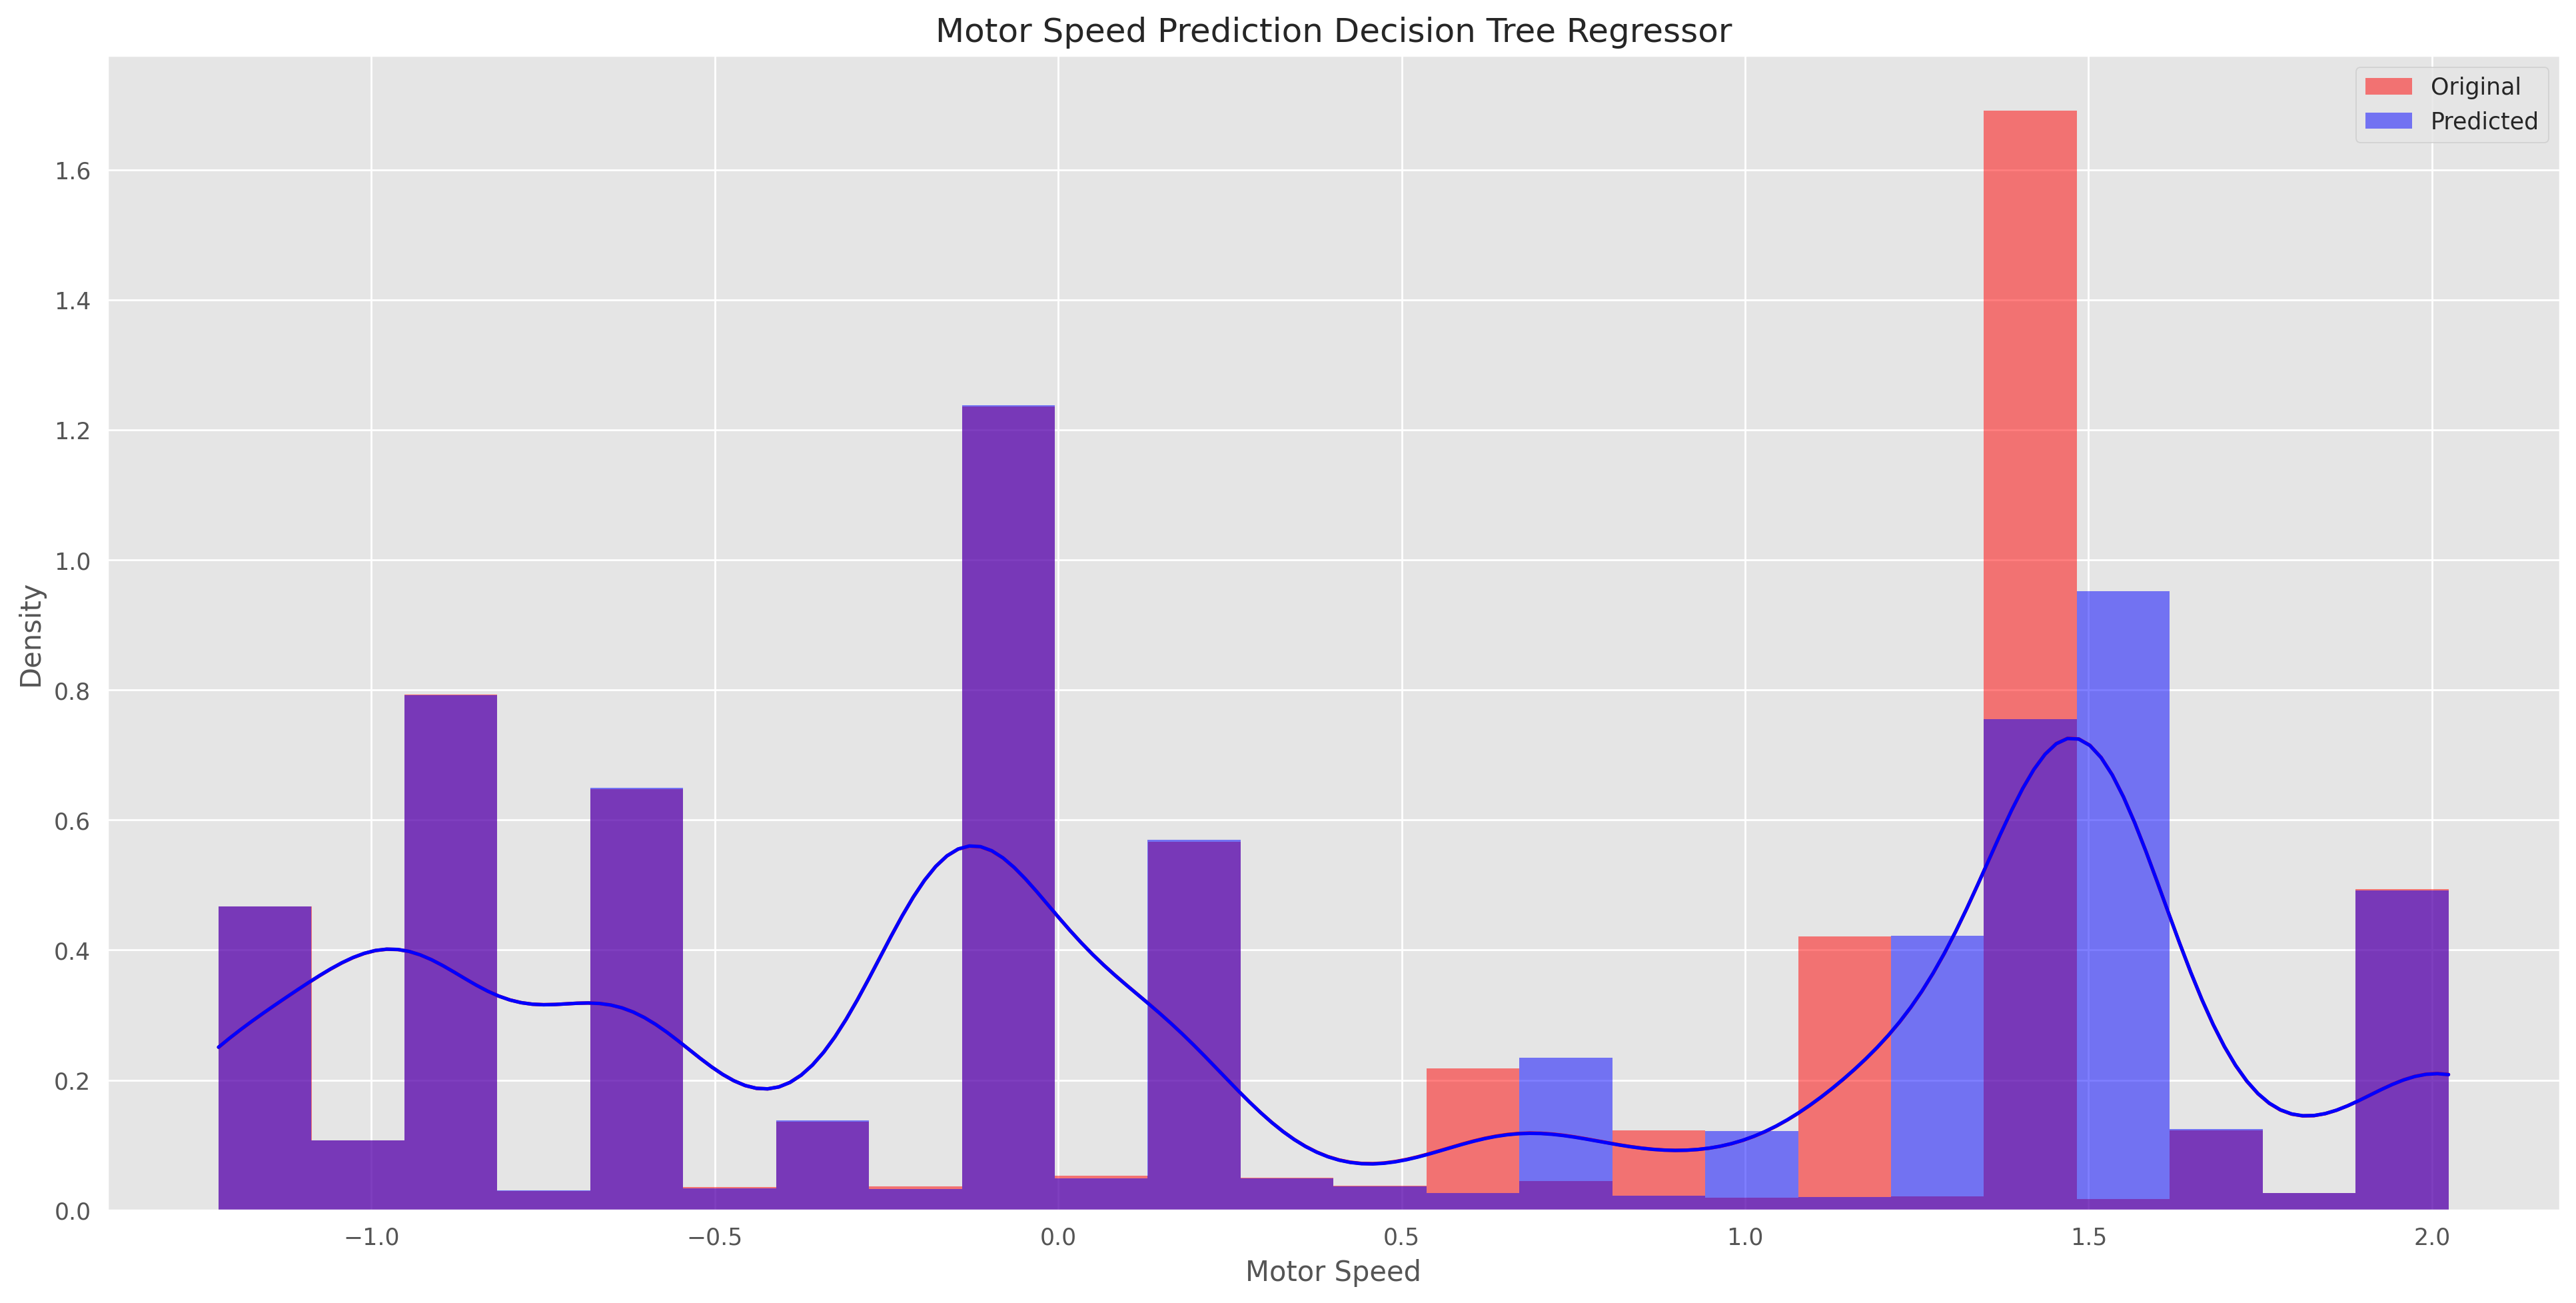

In [55]:
plt.style.use('ggplot')
plt.figure(figsize=(19,9))
sn.histplot(y_test, color="red", kde=True, stat="density", linewidth=0, label = 'Original')
sn.histplot(y_pred1, color="blue", kde=True, stat="density", linewidth=0, label = 'Predicted')
plt.legend(loc = 'upper right')
plt.title("Motor Speed Prediction Decision Tree Regressor")
plt.xlabel("Motor Speed")
plt.ylabel("Density")
plt.show()

**Random Forest Model**

In [ ]:
# Fitting model
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
num_trees = 30
max_features = 3
model_2 = RandomForestRegressor(n_estimators=30, max_features=3)
model_2.fit(X_train,y_train)
y_pred2=model_2.predict(X_test)
# Predection of y values on X test dataset

In [ ]:
# Model Evaluation using r2 score matrix
from sklearn.metrics import r2_score
rms_2=np.round(np.mean((y_pred2-y_test)**2),5)
rmse_2=np.round(np.mean((y_pred2-y_test)**0.5),5)
rmsle_2=np.round(np.log(rmse_2),5)
r2_2=np.round(r2_score(y_test,y_pred2),5)
ar_2=np.round(1 - ((1-r2_2)*(299421-1)/(299421-11-1)),5)
print(rms_2,rmse_2,rmsle_2,r2_2,ar_2)

9e-05 0.01128 -4.48472 0.99992 0.99992


In [ ]:
model_2.score(X_test,y_test)
# Accuracy of the Model

0.9999162459729768

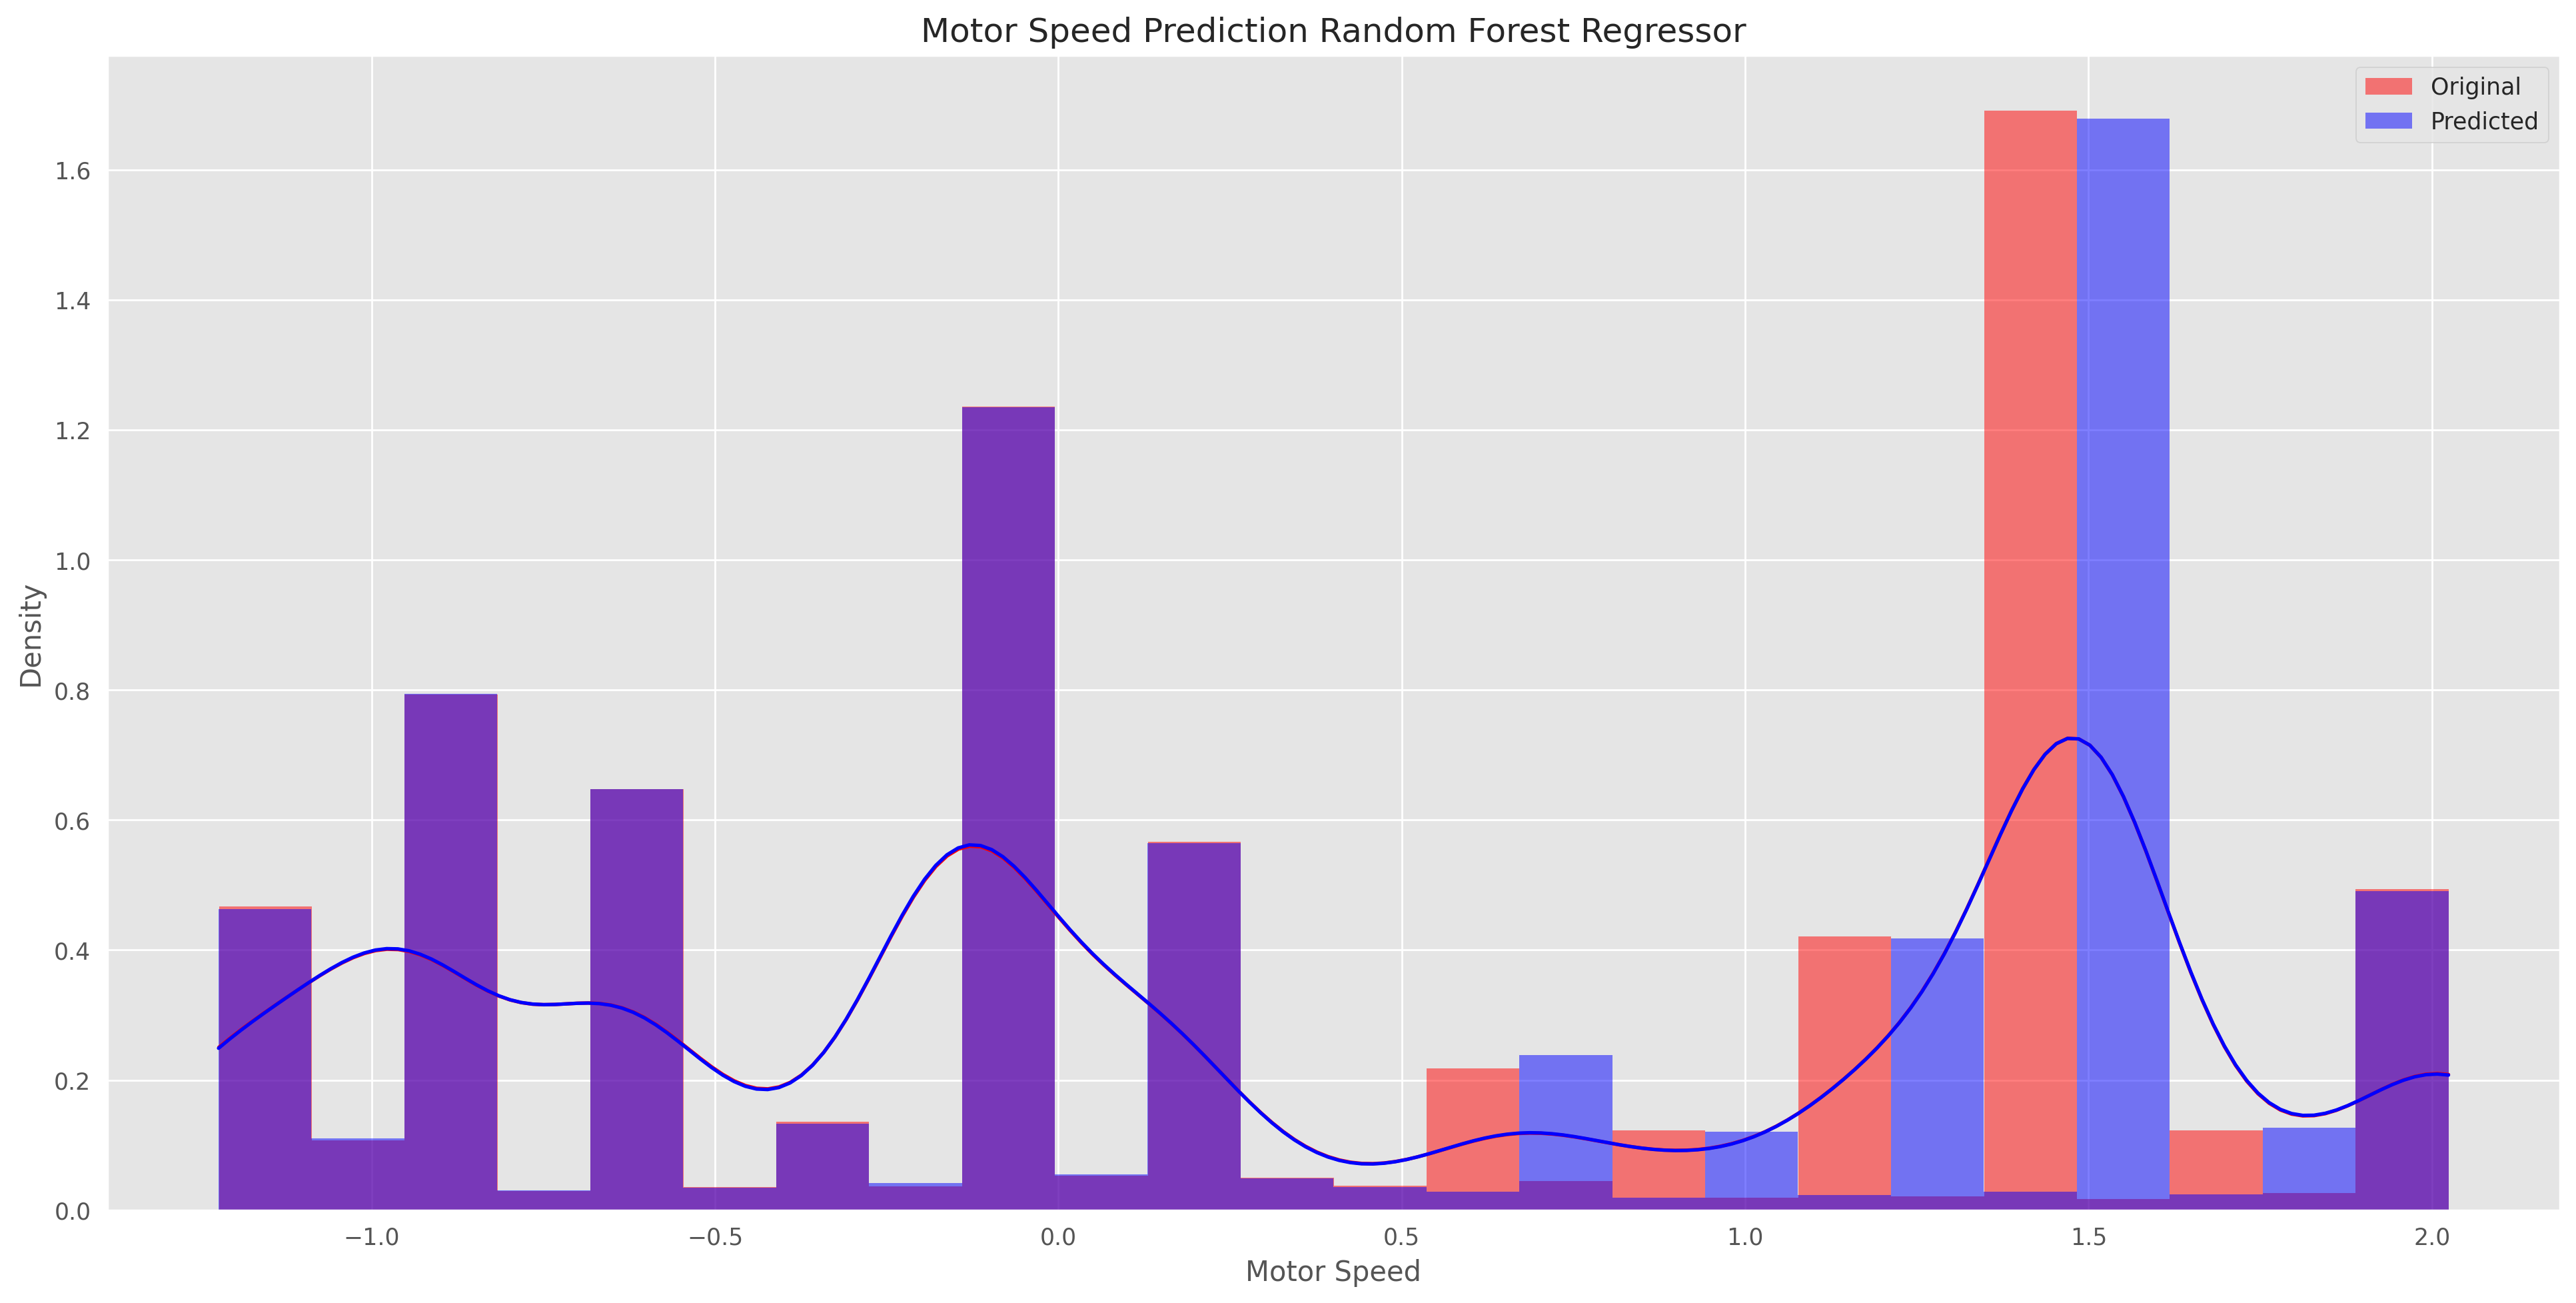

In [56]:
plt.style.use('ggplot')
plt.figure(figsize=(19,9))
sn.histplot(y_test, color="red", kde=True, stat="density", linewidth=0, label = 'Original')
sn.histplot(y_pred2, color="blue", kde=True, stat="density", linewidth=0, label = 'Predicted')
plt.legend(loc = 'upper right')
plt.title("Motor Speed Prediction Random Forest Regressor")
plt.xlabel("Motor Speed")
plt.ylabel("Density")
plt.show()

**XG Boost**

In [ ]:
# Fitting model
from xgboost import XGBRegressor
model_3 = XGBRegressor(n_estimators=30,max_depth=3)
model_3.fit(X_train,y_train)
y_pred3=model_3.predict(X_test)

In [ ]:
model_3.score(X_test,y_test)

0.9988659602386609

In [ ]:
# Evaluationg The Model
from sklearn.metrics import r2_score
rms_3=np.round(np.mean((y_pred3-y_test)**2),5)
rmse_3=np.round(np.mean((y_pred3-y_test)**0.5),5)
rmsle_3=np.round(np.log(rmse_3),5)
r2_3=np.round(r2_score(y_test,y_pred3),5)
ar_3=np.round(1 - ((1-r2_3)*(299421-1)/(299421-11-1)),5)
print(rms_3,rmse_3,rmsle_3,r2_3,ar_3)

0.00124 0.08114 -2.51158 0.99887 0.99887


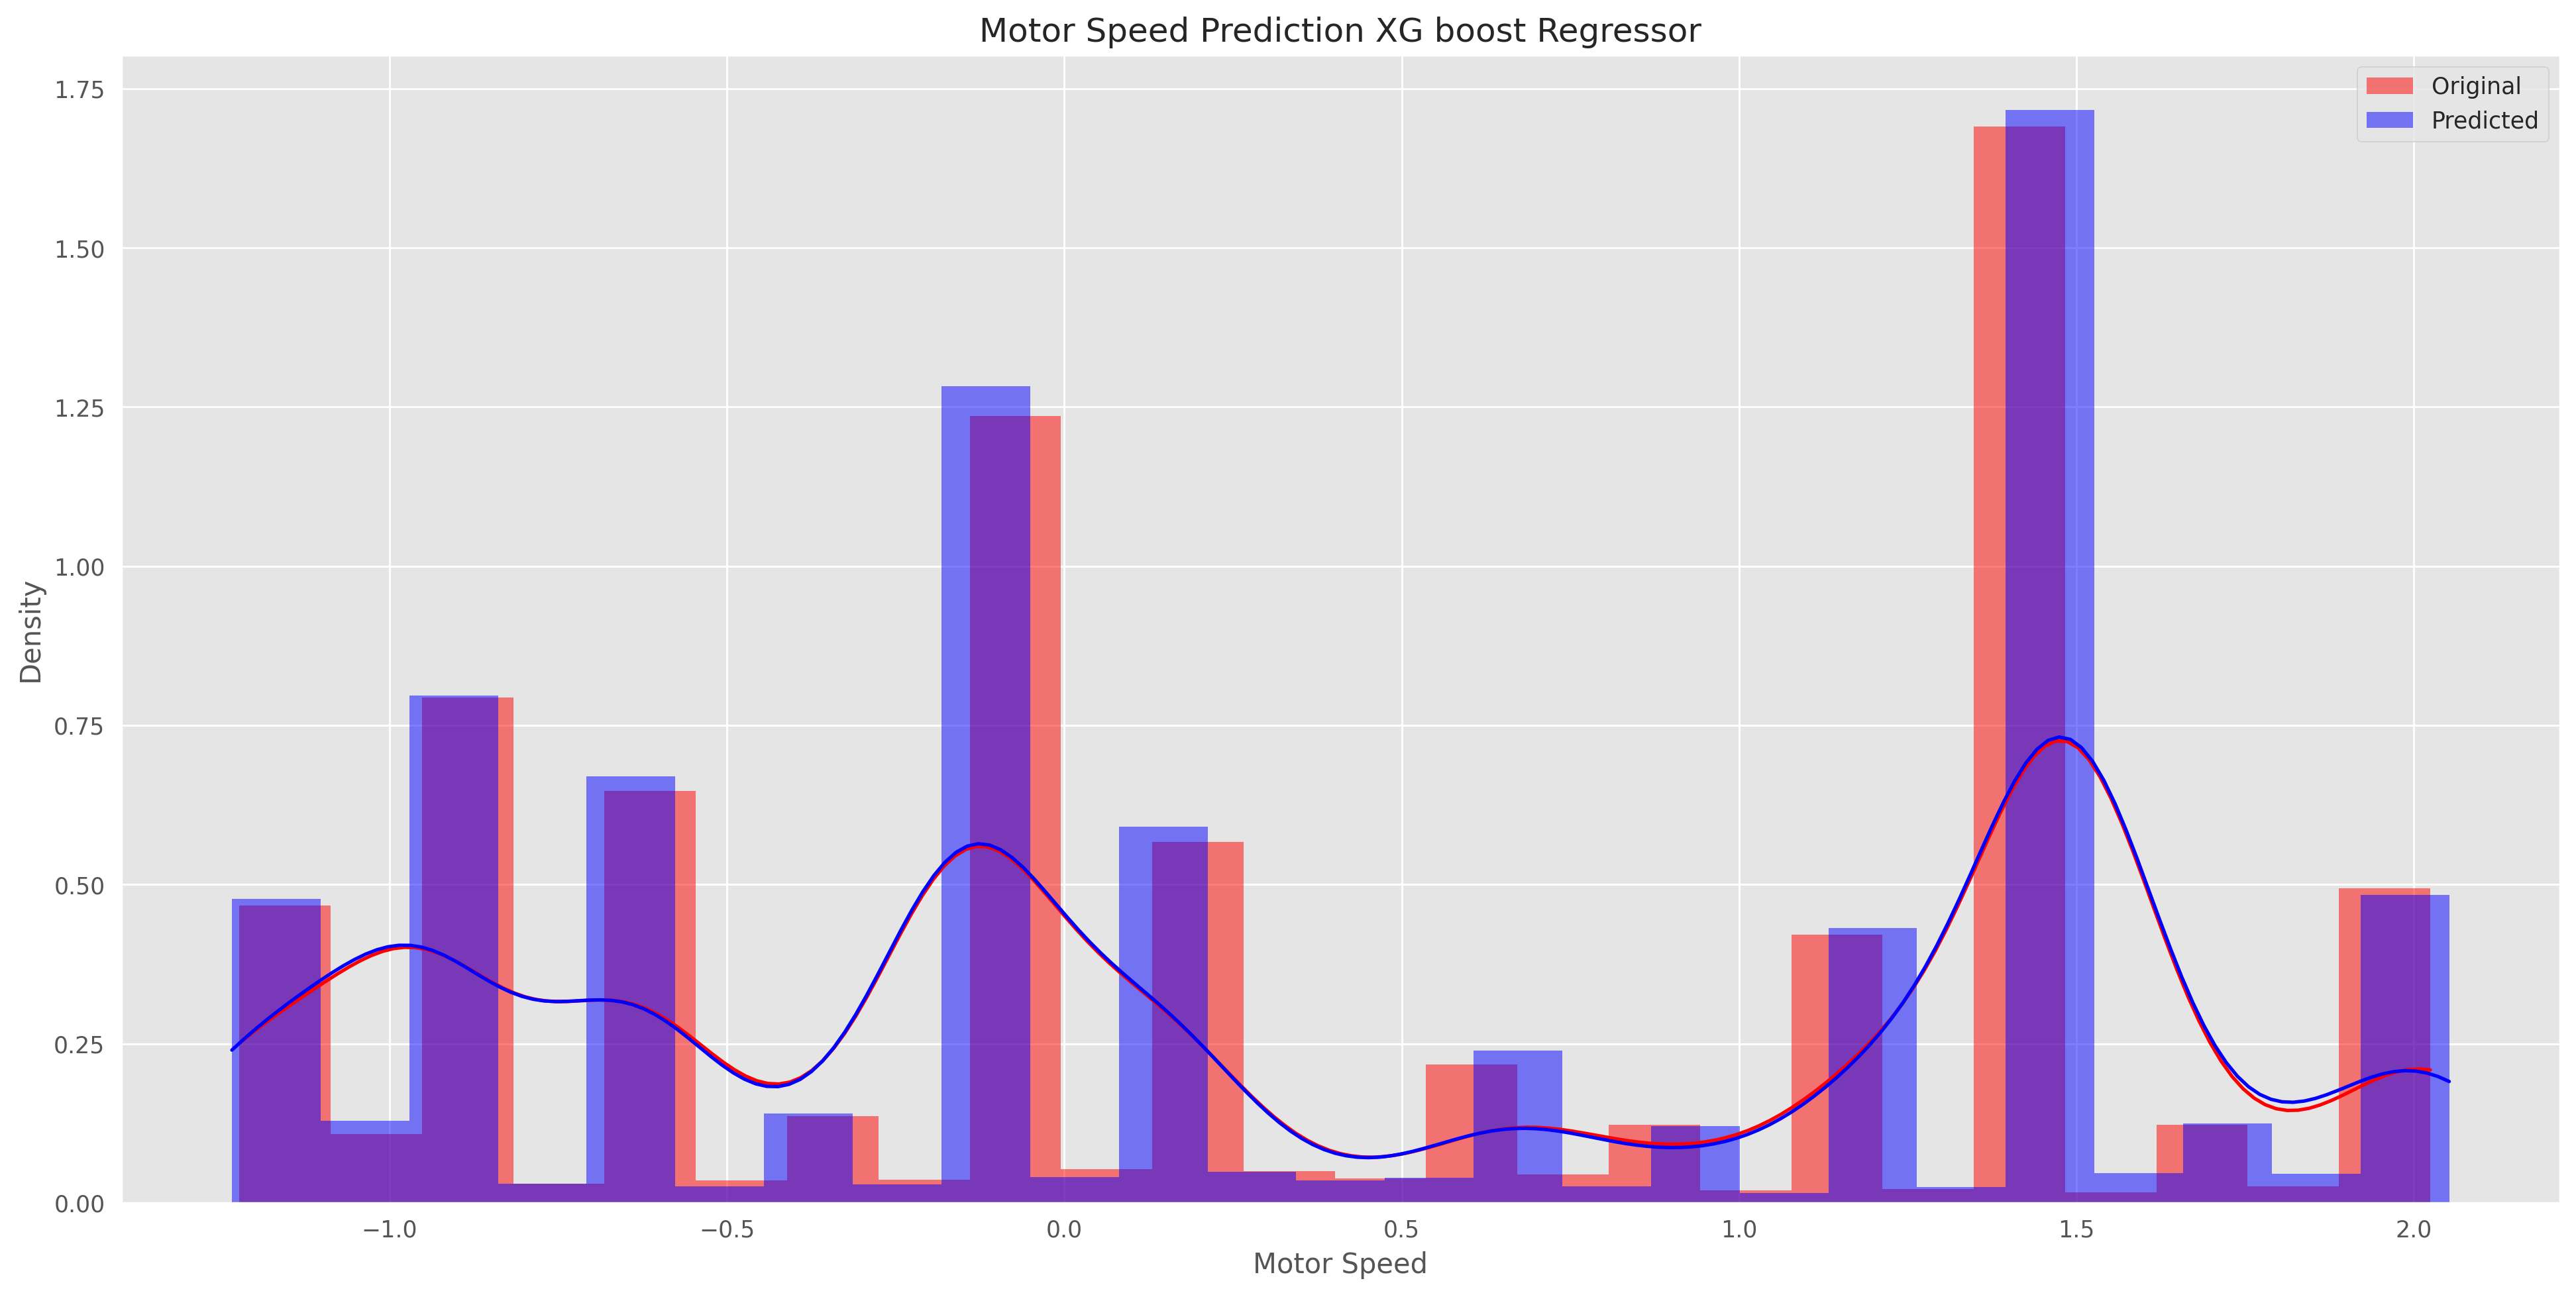

In [57]:
plt.style.use('ggplot')
plt.figure(figsize=(19,9))
sn.histplot(y_test, color="red", kde=True, stat="density", linewidth=0, label = 'Original')
sn.histplot(y_pred3, color="blue", kde=True, stat="density", linewidth=0, label = 'Predicted')
plt.legend(loc = 'upper right')
plt.title("Motor Speed Prediction XG boost Regressor")
plt.xlabel("Motor Speed")
plt.ylabel("Density")
plt.show()

In [ ]:
Model_Evaluations=pd.DataFrame({'Models':['Decision Tress','Random Forest','XGBoost'],
                                'Accuracy':[r2_1*100,r2_2*100,r2_3*100],
                                'R Squared':[r2_1,r2_2,r2_3],
                                'Adjusted R Square':[ar_1,ar_2,ar_3],
                                'Mean square error':[rms_1,rms_2,rms_3],
                                'Root Mean square error':[rmse_1,rmse_2,rmse_3],
                                'Root Mean squared log error':[rmsle_1,rmsle_2,rmsle_3]})
Model_Evaluations

,Models,Accuracy,R Squared,Adjusted R Square,Mean square error,Root Mean square error,Root Mean squared log error
0,Decision Tress,99.990,0.99990,0.99990,0.00011,0.01030,-4.57561
1,Random Forest,99.992,0.99992,0.99992,0.00009,0.01128,-4.48472
2,XGBoost,99.887,0.99887,0.99887,0.00124,0.08114,-2.51158
